In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_excel('Response1.xlsx')

In [5]:
df.rename(columns={
    'What is your gender?': 'Gender',
    'What is your age?': 'Age',
    'What is your Monthly Household Income?': 'Income'
}, inplace=True)

In [ ]:
df.head()

In [6]:
print(df.isnull().sum())
print(df.dtypes)

Gender    0
Age       0
Income    0
K1        0
K2        0
K3        0
K4        0
K5        0
ATT1      0
ATT2      0
ATT3      0
ATT4      0
ATT5      0
P1        0
P2        0
P3        0
P4        0
P5        0
dtype: int64
Gender    int64
Age       int64
Income    int64
K1        int64
K2        int64
K3        int64
K4        int64
K5        int64
ATT1      int64
ATT2      int64
ATT3      int64
ATT4      int64
ATT5      int64
P1        int64
P2        int64
P3        int64
P4        int64
P5        int64
dtype: object


Calculate descriptive statistics for knowledge questions

In [10]:
knowledge_questions = ['K1', 'K2', 'K3', 'K4', 'K5']
descriptive_stats = df[knowledge_questions].describe()
print(descriptive_stats)

                K1           K2           K3           K4           K5
count  1123.000000  1123.000000  1123.000000  1123.000000  1123.000000
mean      2.658949     2.395370     3.185218     2.798753     3.016919
std       1.288361     1.131487     1.344254     1.336622     1.375453
min       1.000000     1.000000     1.000000     1.000000     1.000000
25%       2.000000     2.000000     2.000000     2.000000     2.000000
50%       3.000000     2.000000     3.000000     3.000000     3.000000
75%       3.000000     3.000000     4.000000     4.000000     4.000000
max       5.000000     5.000000     5.000000     5.000000     5.000000


Create histograms for each knowledge question

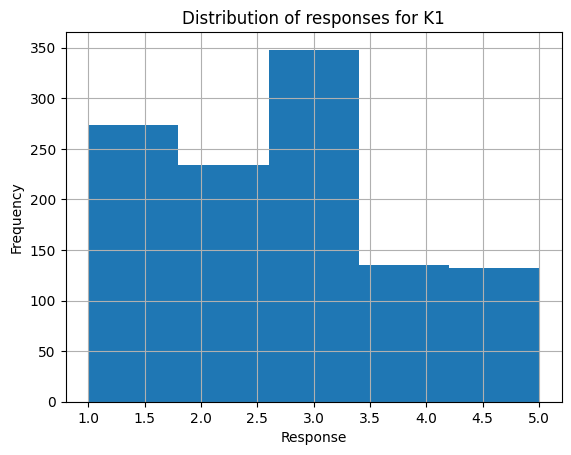

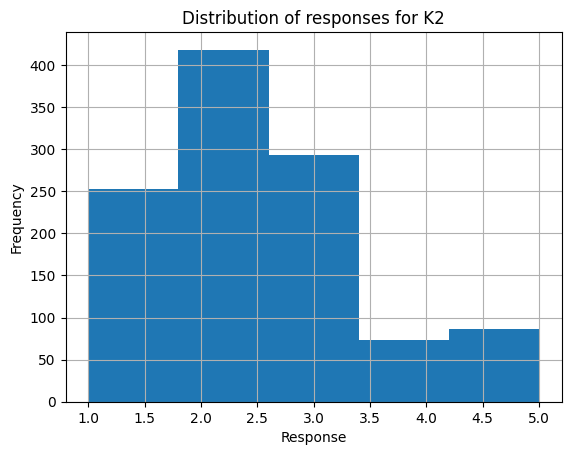

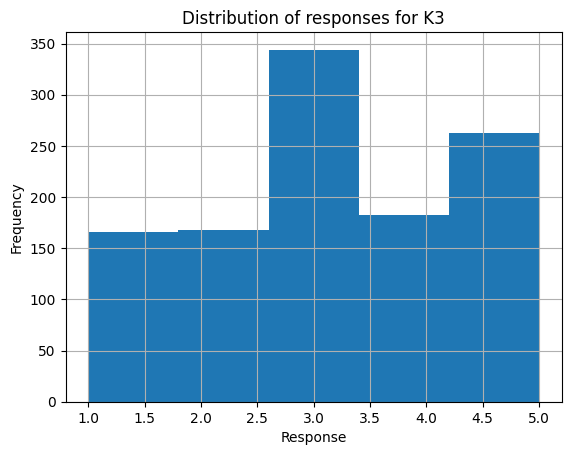

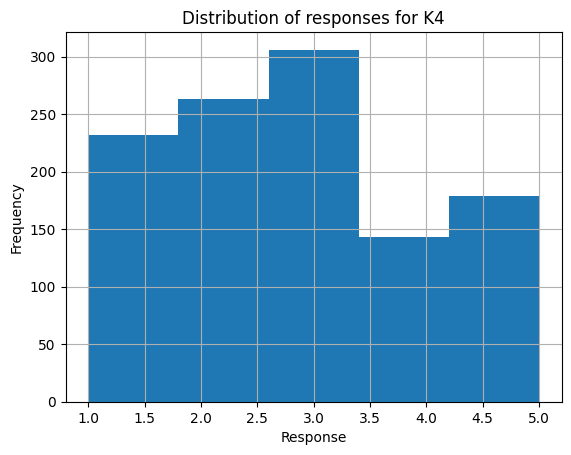

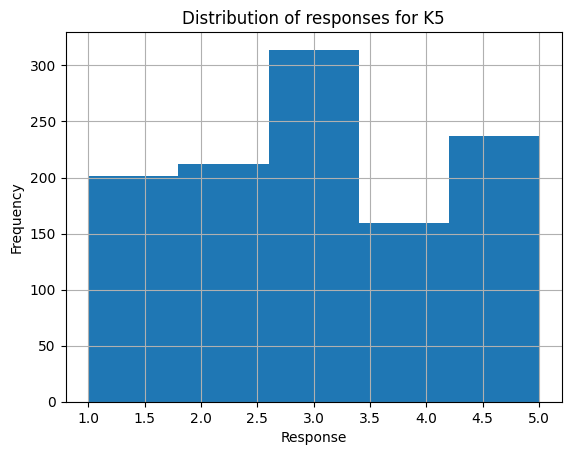

In [11]:
for question in knowledge_questions:
    plt.figure()
    df[question].hist(bins=5)
    plt.title(f'Distribution of responses for {question}')
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.show()


Data Distribution By Gender

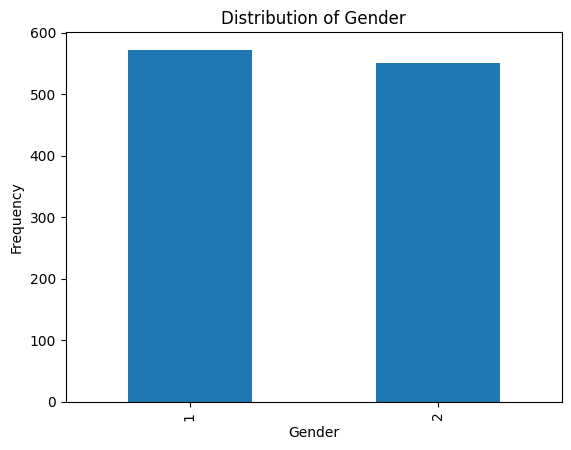

In [12]:
plt.figure()
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Data Distribution By Age

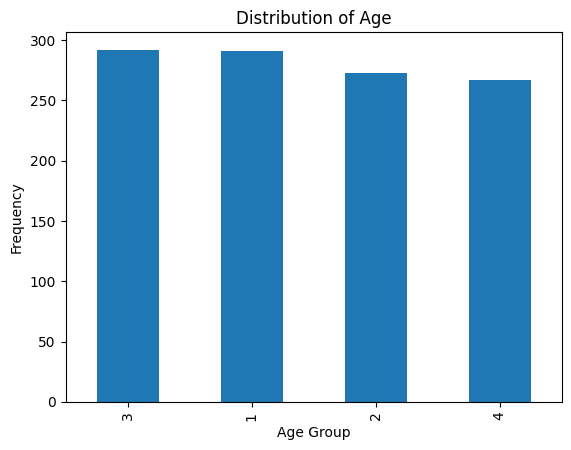

In [31]:
plt.figure()
df['Age'].value_counts().plot(kind='bar')
plt.title('Distribution of Age')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

Data Distribution By Income

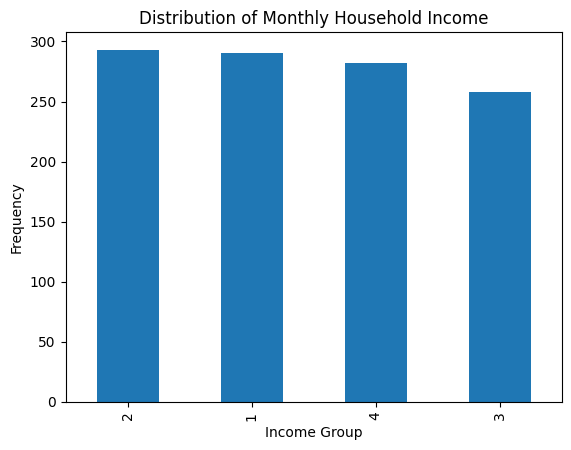

In [13]:
plt.figure()
df['Income'].value_counts().plot(kind='bar')
plt.title('Distribution of Monthly Household Income')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.show()

Create a boxplot to compare the distributions of knowledge questions by gender

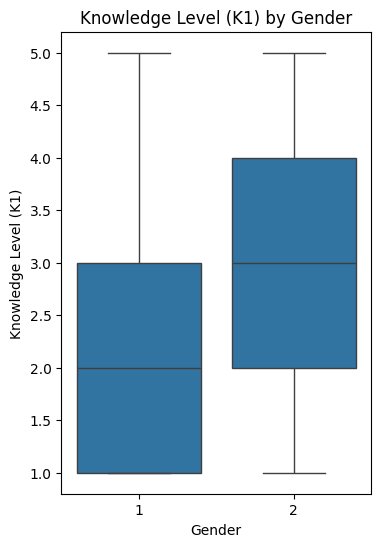

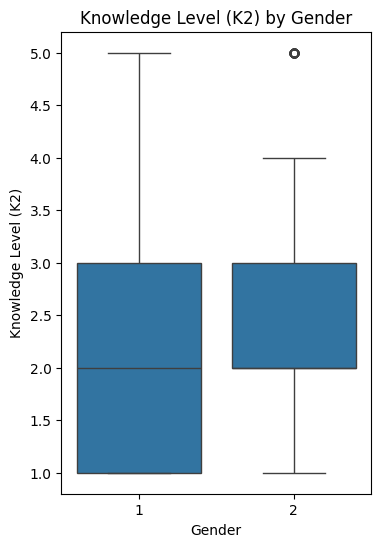

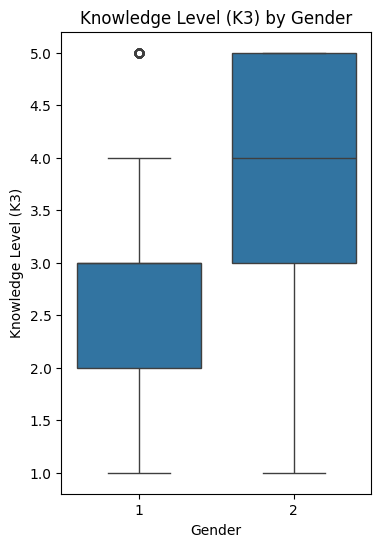

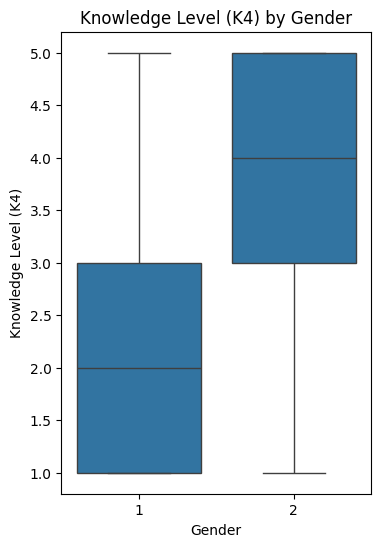

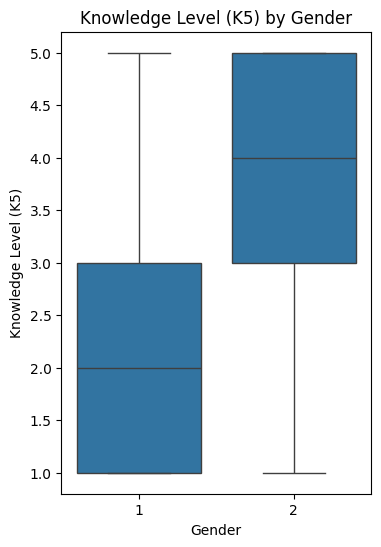

In [14]:
plt.figure(figsize=(4, 6))
sns.boxplot(x='Gender', y='K1', data=df)
plt.title('Knowledge Level (K1) by Gender')
plt.xlabel('Gender')
plt.ylabel('Knowledge Level (K1)')
plt.show()

for question in knowledge_questions[1:]:
    plt.figure(figsize=(4, 6))
    sns.boxplot(x='Gender', y=question, data=df)
    plt.title(f'Knowledge Level ({question}) by Gender')
    plt.xlabel('Gender')
    plt.ylabel(f'Knowledge Level ({question})')
    plt.show()

Calculate the average knowledge levels by gender

In [16]:
gender_knowledge_summary = df.groupby('Gender')[knowledge_questions].median()
print(gender_knowledge_summary)


         K1   K2   K3   K4   K5
Gender                         
1       2.0  2.0  3.0  2.0  2.0
2       3.0  2.0  4.0  4.0  4.0


Visualize the average knowledge levels by gender

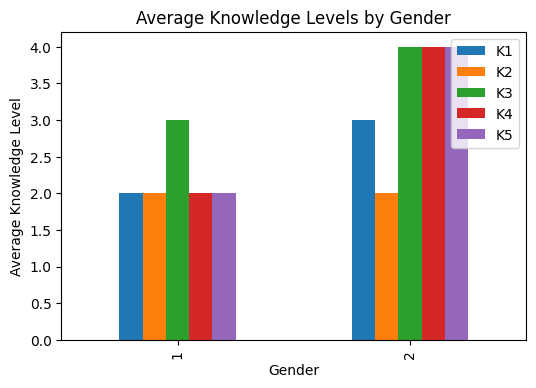

In [17]:
gender_knowledge_summary.plot(kind='bar', figsize=(6, 4))
plt.title('Average Knowledge Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Knowledge Level')
plt.legend(loc='upper right')
plt.show()


Calculate and visualize the average knowledge levels by age group

      K1   K2   K3   K4   K5
Age                         
1    3.0  2.0  3.0  3.0  3.0
2    3.0  2.0  3.0  3.0  3.0
3    2.5  2.0  3.0  3.0  3.0
4    3.0  2.0  4.0  3.0  3.0


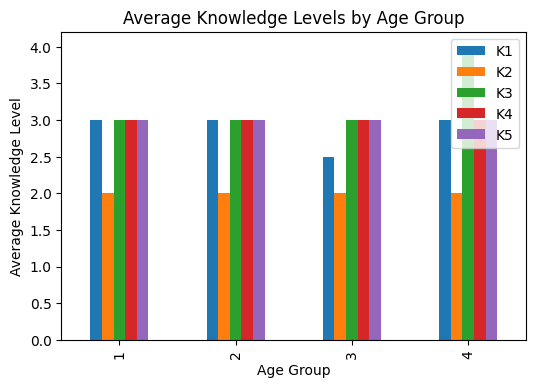

In [18]:
age_knowledge_summary = df.groupby('Age')[knowledge_questions].median()
print(age_knowledge_summary)

age_knowledge_summary.plot(kind='bar', figsize=(6, 4))
plt.title('Average Knowledge Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Knowledge Level')
plt.legend(loc='upper right')
plt.show()


Calculate and Visualize the average knowledge levels by income group

         K1   K2   K3   K4   K5
Income                         
1       4.0  2.0  4.0  3.0  4.0
2       3.0  3.0  3.0  3.0  3.0
3       2.0  2.0  3.0  3.0  3.0
4       2.0  2.0  3.0  3.0  3.0


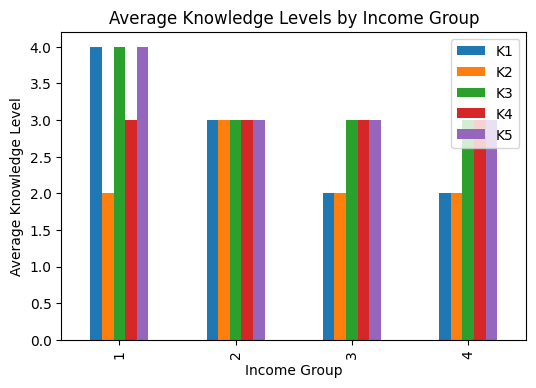

In [19]:
income_knowledge_summary = df.groupby('Income')[knowledge_questions].median()
print(income_knowledge_summary)

income_knowledge_summary.plot(kind='bar', figsize=(6, 4))
plt.title('Average Knowledge Levels by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Knowledge Level')
plt.legend(loc='upper right')
plt.show()

Calculate the average attitude levels by gender

In [20]:
attitude_questions = ['ATT1', 'ATT2', 'ATT3', 'ATT4', 'ATT5']
gender_attitude_summary = df.groupby('Gender')[attitude_questions].median()
print(gender_attitude_summary)


        ATT1  ATT2  ATT3  ATT4  ATT5
Gender                              
1        2.0   3.0   2.0   3.0   2.0
2        2.0   2.0   2.0   2.0   2.0


Calculate the average attitude levels by age group

In [21]:
age_attitude_summary = df.groupby('Age')[attitude_questions].median()
print(age_attitude_summary)

     ATT1  ATT2  ATT3  ATT4  ATT5
Age                              
1     2.0   2.0   2.0   3.0   2.0
2     2.0   2.0   2.0   2.0   2.0
3     2.0   2.0   2.0   2.0   2.0
4     2.0   3.0   2.0   3.0   2.0


Calculate the average attitude levels by income group

In [22]:
income_attitude_summary = df.groupby('Income')[attitude_questions].median()
print(income_attitude_summary)


        ATT1  ATT2  ATT3  ATT4  ATT5
Income                              
1        2.0   2.0   2.0   2.0   2.0
2        2.0   2.0   2.0   3.0   2.0
3        2.0   3.0   2.0   3.0   3.0
4        2.0   2.0   2.0   3.0   2.0


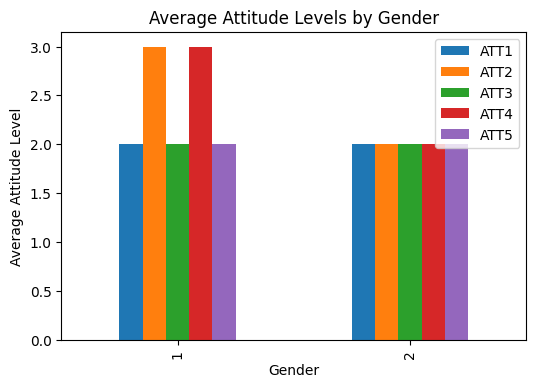

In [23]:
gender_attitude_summary.plot(kind='bar', figsize=(6, 4))
plt.title('Average Attitude Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Attitude Level')
plt.legend(loc='upper right')
plt.show()


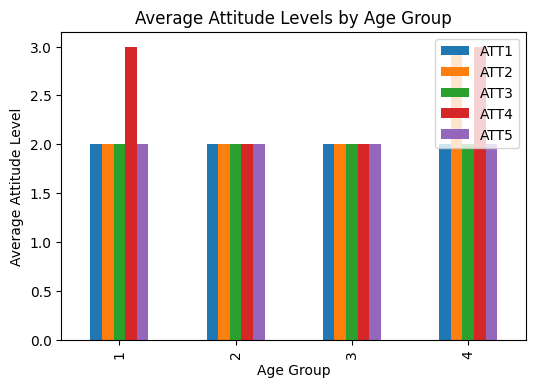

In [24]:
age_attitude_summary.plot(kind='bar', figsize=(6, 4))
plt.title('Average Attitude Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Attitude Level')
plt.legend(loc='upper right')
plt.show()


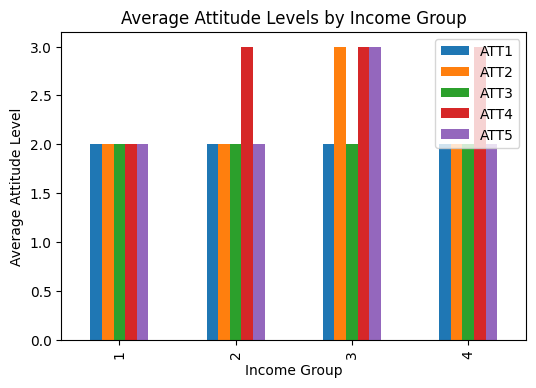

In [25]:
income_attitude_summary.plot(kind='bar', figsize=(6, 4))
plt.title('Average Attitude Levels by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Attitude Level')
plt.legend(loc='upper right')
plt.show()


Calculate the average practice levels by gender

In [27]:
practice_questions = ['P1', 'P2', 'P3', 'P4', 'P5']
gender_practice_summary = df.groupby('Gender')[practice_questions].median()
print(gender_practice_summary)


         P1   P2   P3   P4   P5
Gender                         
1       4.0  2.0  3.0  3.0  3.0
2       4.0  2.0  3.0  3.0  3.0


In [28]:
age_practice_summary = df.groupby('Age')[practice_questions].median()
print(age_practice_summary)

      P1   P2   P3   P4   P5
Age                         
1    4.0  2.0  3.0  3.0  3.0
2    4.0  2.0  3.0  3.0  3.0
3    3.0  3.0  3.0  3.0  3.0
4    4.0  2.0  3.0  3.0  3.0


In [29]:
income_practice_summary = df.groupby('Income')[practice_questions].median()
print(income_practice_summary)

         P1   P2   P3   P4   P5
Income                         
1       4.0  3.0  3.0  3.0  3.0
2       3.0  3.0  3.0  3.0  3.0
3       4.0  2.0  3.0  3.0  3.0
4       4.0  2.0  3.0  3.0  3.0


Visualize the average practice levels by gender

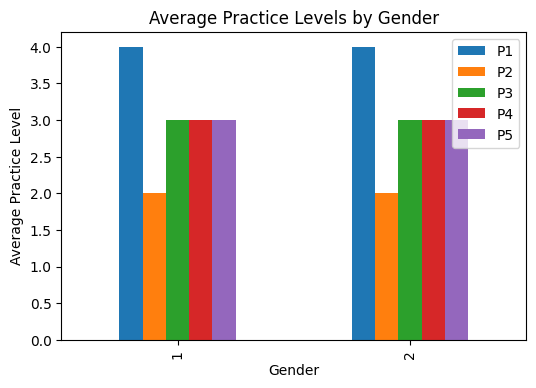

In [24]:
gender_practice_summary.plot(kind='bar', figsize=(6, 4))
plt.title('Average Practice Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Practice Level')
plt.legend(loc='upper right')
plt.show()


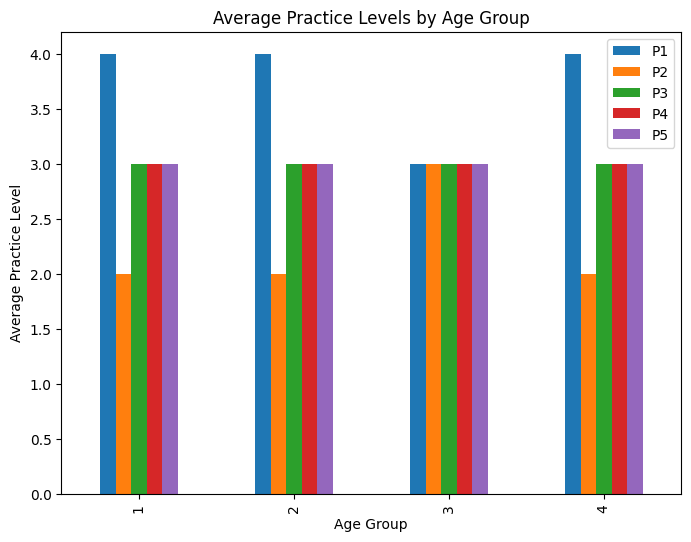

In [30]:
age_practice_summary.plot(kind='bar', figsize=(8, 6))
plt.title('Average Practice Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Practice Level')
plt.legend(loc='upper right')
plt.show()


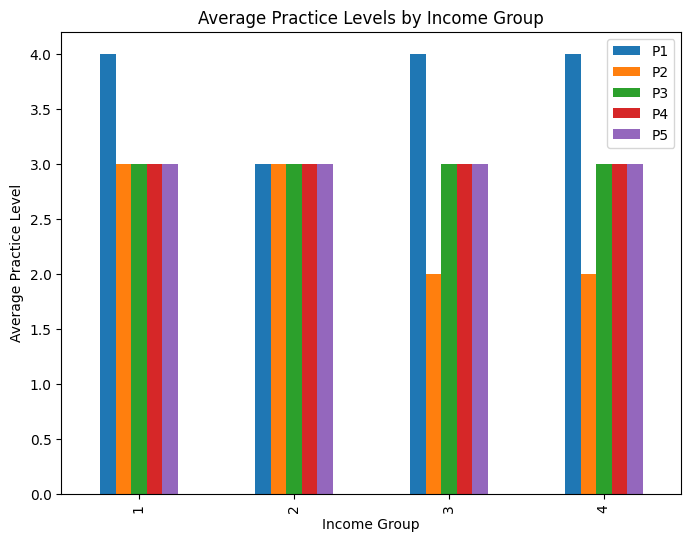

In [26]:
income_practice_summary.plot(kind='bar', figsize=(8, 6))
plt.title('Average Practice Levels by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Practice Level')
plt.legend(loc='upper right')
plt.show()


Descriptive statistics for knowledge, attitude, and practice questions

In [32]:
knowledge_stats = df[['K1', 'K2', 'K3', 'K4', 'K5']].describe()
attitude_stats = df[['ATT1', 'ATT2', 'ATT3', 'ATT4', 'ATT5']].describe()
practice_stats = df[['P1', 'P2', 'P3', 'P4', 'P5']].describe()

print("Knowledge Questions Descriptive Statistics:\n", knowledge_stats)
print("Attitude Questions Descriptive Statistics:\n", attitude_stats)
print("Practice Questions Descriptive Statistics:\n", practice_stats)


Knowledge Questions Descriptive Statistics:
                 K1           K2           K3           K4           K5
count  1123.000000  1123.000000  1123.000000  1123.000000  1123.000000
mean      2.658949     2.395370     3.185218     2.798753     3.016919
std       1.288361     1.131487     1.344254     1.336622     1.375453
min       1.000000     1.000000     1.000000     1.000000     1.000000
25%       2.000000     2.000000     2.000000     2.000000     2.000000
50%       3.000000     2.000000     3.000000     3.000000     3.000000
75%       3.000000     3.000000     4.000000     4.000000     4.000000
max       5.000000     5.000000     5.000000     5.000000     5.000000
Attitude Questions Descriptive Statistics:
               ATT1         ATT2         ATT3         ATT4        ATT5
count  1123.000000  1123.000000  1123.000000  1123.000000  1123.00000
mean      2.337489     2.566340     2.476402     2.580588     2.48976
std       1.148933     1.308074     1.231684     1.305226     

Crosstab analysis for gender, age, and income with responses

In [35]:
gender_knowledge_crosstab = pd.crosstab(df['Gender'], df[['K1', 'K2', 'K3', 'K4', 'K5']].mean(axis=1))
age_knowledge_crosstab = pd.crosstab(df['Age'], df[['K1', 'K2', 'K3', 'K4', 'K5']].mean(axis=1))
income_knowledge_crosstab = pd.crosstab(df['Income'], df[['K1', 'K2', 'K3', 'K4', 'K5']].mean(axis=1))

print("Gender vs Knowledge Crosstab:\n", gender_knowledge_crosstab)
print("Age vs Knowledge Crosstab:\n", age_knowledge_crosstab)
print("Income vs Knowledge Crosstab:\n", income_knowledge_crosstab)


Gender vs Knowledge Crosstab:
 col_0   1.0  1.2  1.4  1.6  1.8  2.0  2.2  2.4  2.6  2.8  3.0  3.2  3.4  3.6  \
Gender                                                                         
1         3   11   27   52   73   82   79   70   34   13   10    1   37   44   
2         2    3    6    9   12   16   23   18   22   34   47   70   58   59   

col_0   3.8  4.0  4.2  4.4  4.6  4.8  
Gender                                
1        26    6    3    0    1    0  
2        62   45   36   18    7    4  
Age vs Knowledge Crosstab:
 col_0  1.0  1.2  1.4  1.6  1.8  2.0  2.2  2.4  2.6  2.8  3.0  3.2  3.4  3.6  \
Age                                                                           
1        0    4    5   17   32   26   25   26   16   10   14   19   18   23   
2        2    3    8   11   20   28   20   20   16   10   12   10   21   32   
3        2    6   14   23   24   28   33   22    9   12   12   19   26   20   
4        1    1    6   10    9   16   24   20   15   15   19   23   3

Elbow Method to determine the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

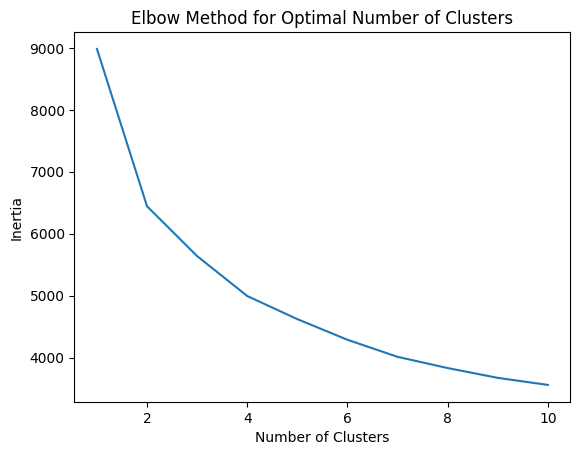

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

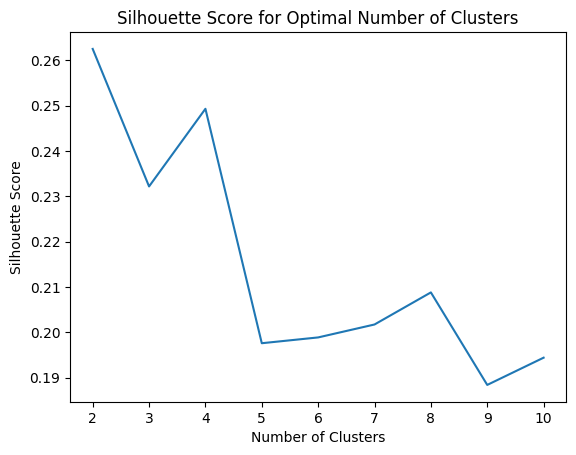

In [33]:
features = df[['Gender', 'Age', 'Income', 'K1', 'K2', 'K3', 'K4', 'K5']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

inertia = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range_n_clusters, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

silhouette_avg = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(features_scaled, cluster_labels))

plt.plot(range_n_clusters[1:], silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()



In [19]:


optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
kmeans.fit(features_scaled)
df['Cluster'] = kmeans.labels_


In [20]:
# Analyze the characteristics of each segment
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())


Cluster 0:
           Gender         Age      Income          K1          K2          K3  \
count  578.000000  578.000000  578.000000  578.000000  578.000000  578.000000   
mean     1.782007    2.564014    2.086505    3.359862    2.676471    4.134948   
std      0.413240    1.134103    1.124545    1.251099    1.211227    0.878665   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    2.000000    1.000000    3.000000    2.000000    3.000000   
50%      2.000000    3.000000    2.000000    3.000000    2.000000    4.000000   
75%      2.000000    4.000000    3.000000    4.000000    3.000000    5.000000   
max      2.000000    4.000000    4.000000    5.000000    5.000000    5.000000   

               K4          K5        ATT1        ATT2        ATT3        ATT4  \
count  578.000000  578.000000  578.000000  578.000000  578.000000  578.000000   
mean     3.622837    3.920415    2.326990    2.628028    2.403114    2.657439   
std      1.17732

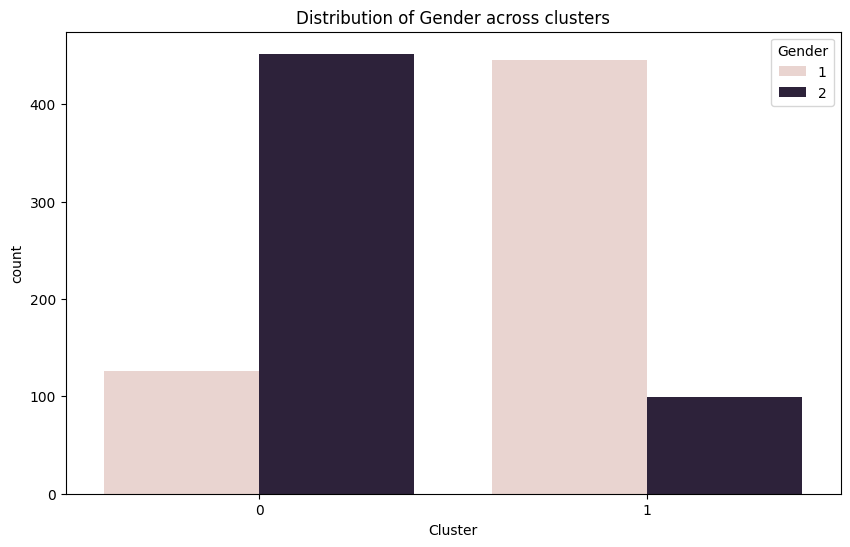

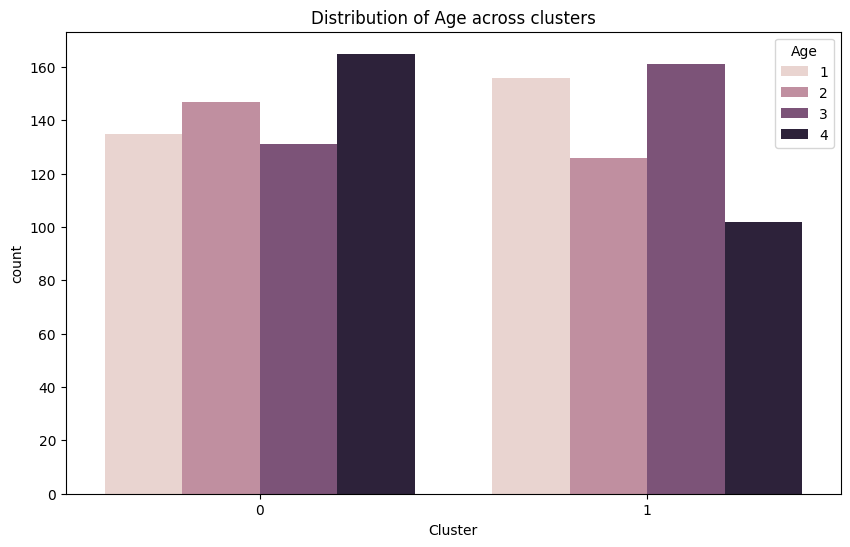

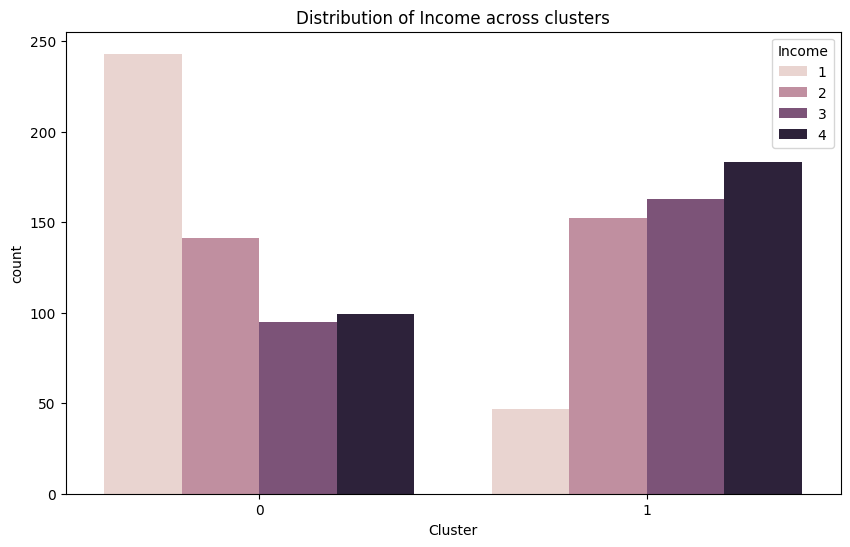

In [21]:
for col in ['Gender', 'Age', 'Income']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', hue=col, data=df)
    plt.title(f'Distribution of {col} across clusters')
    plt.show()


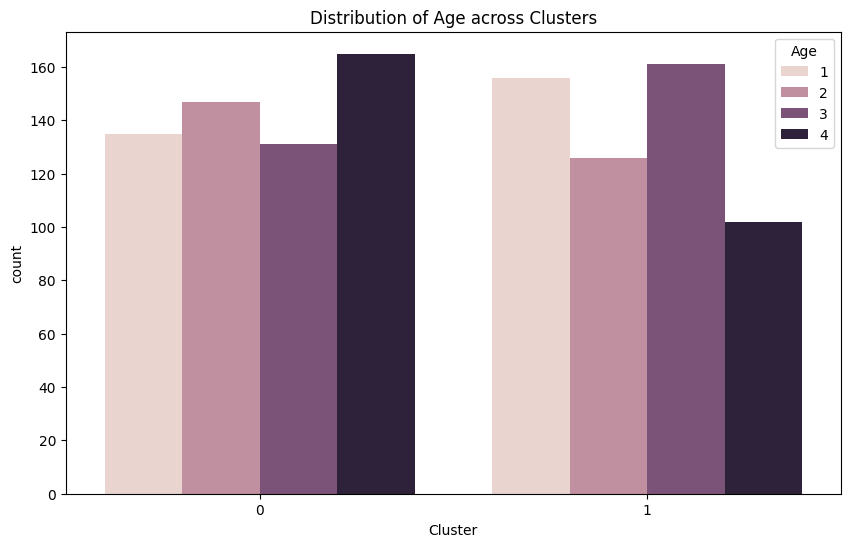

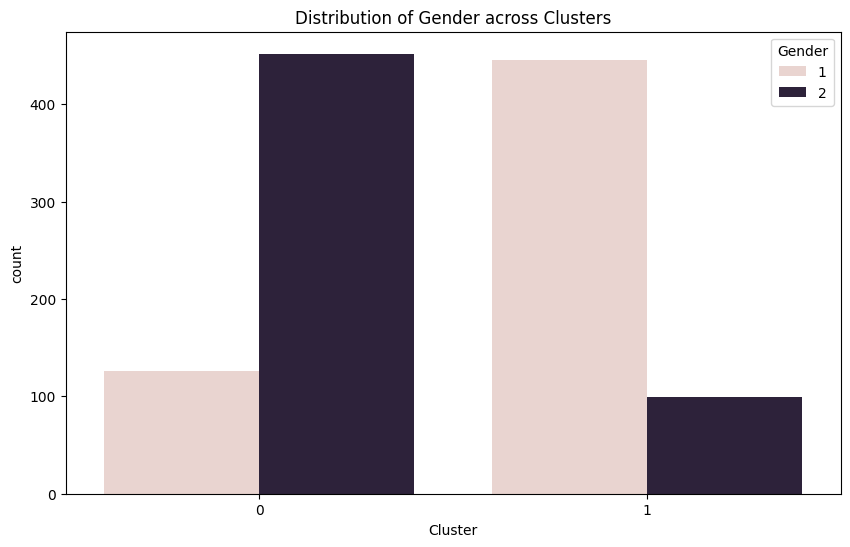

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Age')
plt.title('Distribution of Age across Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')
plt.title('Distribution of Gender across Clusters')
plt.show()


<Figure size 1000x600 with 0 Axes>

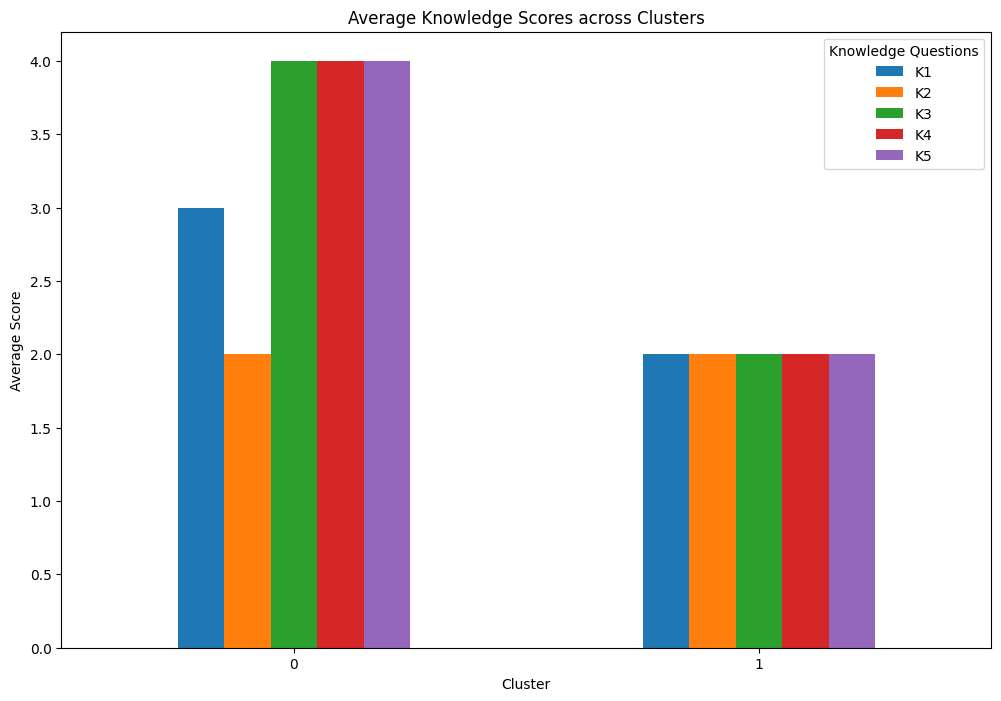

In [23]:
knowledge_columns = ['K1', 'K2', 'K3', 'K4', 'K5']
cluster_knowledge_means = df.groupby('Cluster')[knowledge_columns].median()

plt.figure(figsize=(10, 6))
cluster_knowledge_means.plot(kind='bar', figsize=(12, 8))
plt.title('Average Knowledge Scores across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Knowledge Questions')
plt.show()


<Figure size 1000x600 with 0 Axes>

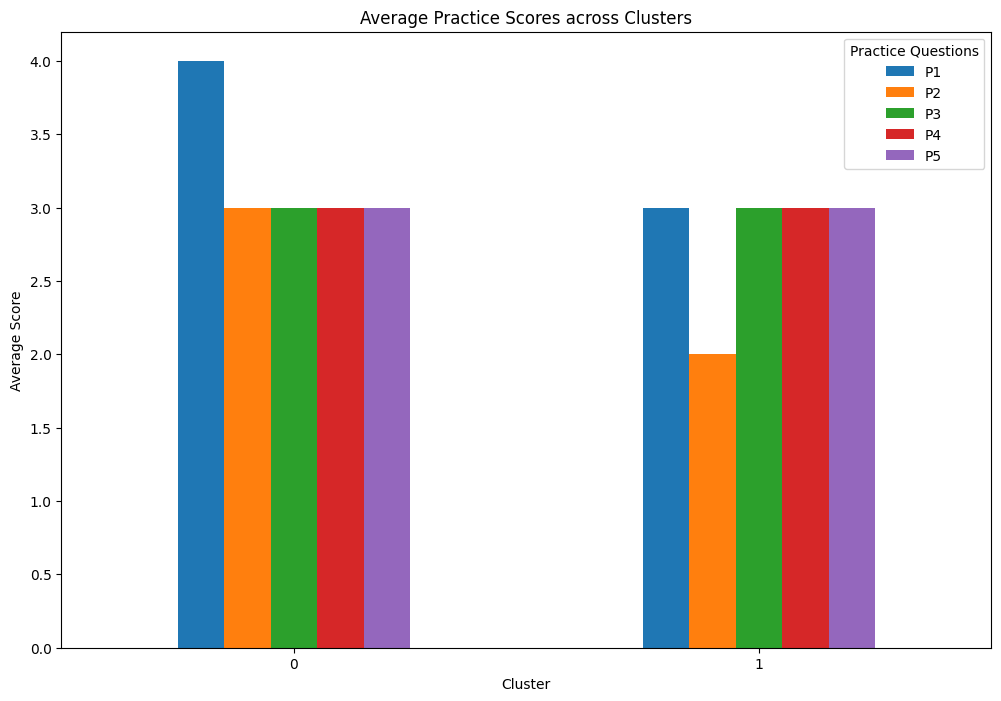

In [24]:
practice_columns = ['P1', 'P2', 'P3', 'P4', 'P5']
cluster_practice_means = df.groupby('Cluster')[practice_columns].median()

plt.figure(figsize=(10, 6))
cluster_practice_means.plot(kind='bar', figsize=(12, 8))
plt.title('Average Practice Scores across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Practice Questions')
plt.show()